In [1]:
from utils.util import file_reader, data_preparation, shuffle_dataset, column_transformation
from models.model import model_a, model_b, model_c, model_d, model_e
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import copy
print("GPU Available: ", tf.test.is_gpu_available())
import warnings
warnings.filterwarnings('ignore')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU Available:  False


In [25]:
training_data = file_reader()
print(training_data.shape)
training_feature_data = copy.deepcopy(training_data)
print(training_data.shape)

(257673, 45)
(257673, 45)


In [4]:
training_data_features, data_labels= data_preparation(training_feature_data)
feature_columns = column_transformation(training_data_features,training_feature_data)
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [5]:
batch_size = 32
train, test = train_test_split(training_data, test_size=0.2,stratify = training_data['label'])
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

train_data_features,train_data_labels = data_preparation(train)
train_dataset = shuffle_dataset(train_data_features,train_data_labels,batch_size)


test_data_features,test_data_labels = data_preparation(test)
test_dataset = shuffle_dataset(test_data_features,test_data_labels,batch_size)

val_data_features,val_data_labels = data_preparation(val)
val_dataset = shuffle_dataset(val_data_features,val_data_labels,batch_size)

164910 train examples
41228 validation examples
51535 test examples


In [29]:
model_a1 = model_a(feature_layer)
initial_learning_rate = 0.1
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96)

model_a1.compile(optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_a = model_a1.fit(train_dataset,
          validation_data=val_dataset,
          epochs=10)

Epoch 1/10
5154/5154 [==============================] - 73s 12ms/step - loss: 0.3040 - accuracy: 0.8788 - val_loss: 0.2438 - val_accuracy: 0.9000
Epoch 2/10
5154/5154 [==============================] - 67s 12ms/step - loss: 0.2818 - accuracy: 0.8838 - val_loss: 0.2415 - val_accuracy: 0.8970
Epoch 3/10
5154/5154 [==============================] - 2246s 435ms/step - loss: 0.2685 - accuracy: 0.8854 - val_loss: 0.2188 - val_accuracy: 0.8958
Epoch 4/10
5154/5154 [==============================] - 60s 10ms/step - loss: 0.2604 - accuracy: 0.8873 - val_loss: 0.2115 - val_accuracy: 0.9109
Epoch 5/10
5154/5154 [==============================] - 70s 12ms/step - loss: 0.2496 - accuracy: 0.8900 - val_loss: 0.2029 - val_accuracy: 0.9077
Epoch 6/10
5154/5154 [==============================] - 68s 12ms/step - loss: 0.2465 - accuracy: 0.8913 - val_loss: 0.2048 - val_accuracy: 0.9145
Epoch 7/10
5154/5154 [==============================] - 69s 12ms/step - loss: 0.2406 - accuracy: 0.8930 - val_loss: 0.230

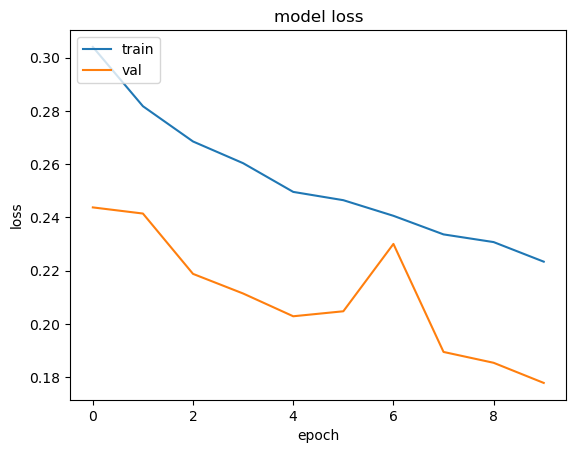

In [30]:
plt.plot(history_a.history['loss'])
plt.plot(history_a.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('Trainingmodel_a.png')
plt.show()

In [31]:
loss, accuracy = model_a1.evaluate(test_dataset)
print("Accuracy: ", accuracy)

1611/1611 [==============================] - 16s 9ms/step - loss: 0.1803 - accuracy: 0.9161
Accuracy:  0.9160570502281189


In [32]:
model_b = model_b(feature_layer)
initial_learning_rate = 0.1

model_b.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_b = model_b.fit(train_dataset,
          validation_data=val_dataset,
          epochs=10)

Epoch 1/10
5154/5154 [==============================] - 97s 16ms/step - loss: 0.3903 - accuracy: 0.8694 - val_loss: 0.3730 - val_accuracy: 0.8851
Epoch 2/10
5154/5154 [==============================] - 88s 16ms/step - loss: 0.3488 - accuracy: 0.8765 - val_loss: 0.2816 - val_accuracy: 0.8952
Epoch 3/10
5154/5154 [==============================] - 88s 15ms/step - loss: 0.3372 - accuracy: 0.8785 - val_loss: 0.2532 - val_accuracy: 0.8958
Epoch 4/10
5154/5154 [==============================] - 88s 15ms/step - loss: 0.3355 - accuracy: 0.8781 - val_loss: 0.2863 - val_accuracy: 0.8817
Epoch 5/10
5154/5154 [==============================] - 88s 15ms/step - loss: 0.3332 - accuracy: 0.8788 - val_loss: 0.2732 - val_accuracy: 0.8928
Epoch 6/10
5154/5154 [==============================] - 87s 15ms/step - loss: 0.3317 - accuracy: 0.8793 - val_loss: 0.2979 - val_accuracy: 0.8947
Epoch 7/10
5154/5154 [==============================] - 89s 16ms/step - loss: 0.3349 - accuracy: 0.8795 - val_loss: 1.1837 -

In [33]:
loss, accuracy = model_b.evaluate(test_dataset)
print("Accuracy: ", accuracy)

1611/1611 [==============================] - 16s 9ms/step - loss: 0.3061 - accuracy: 0.8969
Accuracy:  0.8969244360923767


In [7]:
model_cc = model_c(feature_layer)

model_cc.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_c = model_cc.fit(train_dataset,
          validation_data=val_dataset,
          epochs=20)

Epoch 1/20
5154/5154 [==============================] - 54s 9ms/step - loss: 0.4117 - accuracy: 0.8505 - val_loss: 0.2697 - val_accuracy: 0.8763
Epoch 2/20
5154/5154 [==============================] - 48s 9ms/step - loss: 0.2724 - accuracy: 0.8706 - val_loss: 0.2776 - val_accuracy: 0.8758
Epoch 3/20
5154/5154 [==============================] - 50s 9ms/step - loss: 0.2597 - accuracy: 0.8755 - val_loss: 0.2397 - val_accuracy: 0.8961
Epoch 4/20
5154/5154 [==============================] - 48s 9ms/step - loss: 0.2530 - accuracy: 0.8789 - val_loss: 0.2394 - val_accuracy: 0.8926
Epoch 5/20
5154/5154 [==============================] - 48s 9ms/step - loss: 0.2484 - accuracy: 0.8800 - val_loss: 0.2623 - val_accuracy: 0.8921
Epoch 6/20
5154/5154 [==============================] - 47s 9ms/step - loss: 0.2458 - accuracy: 0.8806 - val_loss: 0.2489 - val_accuracy: 0.8937
Epoch 7/20
5154/5154 [==============================] - 48s 9ms/step - loss: 0.2442 - accuracy: 0.8808 - val_loss: 0.2493 - val_ac

In [8]:
loss, accuracy = model_cc.evaluate(test_dataset)
print("Accuracy: ", accuracy)

1611/1611 [==============================] - 10s 6ms/step - loss: 0.2206 - accuracy: 0.8923
Accuracy:  0.8923255801200867


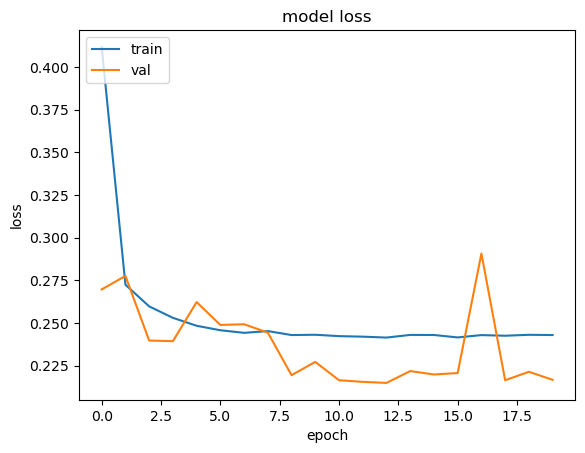

In [9]:
plt.plot(history_c.history['loss'])
plt.plot(history_c.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('Trainingmodel_c.png')
plt.show()

In [10]:
model_dd = model_d(feature_layer)

model_dd.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_d = model_dd.fit(train_dataset,
          validation_data=val_dataset,
          epochs=10)

Epoch 1/10
5154/5154 [==============================] - 66s 11ms/step - loss: 0.5597 - accuracy: 0.8341 - val_loss: 0.3327 - val_accuracy: 0.8478
Epoch 2/10
5154/5154 [==============================] - 59s 11ms/step - loss: 0.3121 - accuracy: 0.8554 - val_loss: 0.2840 - val_accuracy: 0.8806
Epoch 3/10
5154/5154 [==============================] - 57s 10ms/step - loss: 0.2940 - accuracy: 0.8667 - val_loss: 0.3062 - val_accuracy: 0.8785
Epoch 4/10
5154/5154 [==============================] - 59s 11ms/step - loss: 0.2804 - accuracy: 0.8724 - val_loss: 0.2515 - val_accuracy: 0.8963
Epoch 5/10
5154/5154 [==============================] - 57s 10ms/step - loss: 0.2739 - accuracy: 0.8745 - val_loss: 0.3012 - val_accuracy: 0.8959
Epoch 6/10
5154/5154 [==============================] - 58s 11ms/step - loss: 0.2723 - accuracy: 0.8758 - val_loss: 0.2551 - val_accuracy: 0.8963
Epoch 7/10
5154/5154 [==============================] - 58s 11ms/step - loss: 0.2694 - accuracy: 0.8766 - val_loss: 0.2851 -

In [11]:
loss, accuracy = model_dd.evaluate(test_dataset)
print("Accuracy: ", accuracy)

1611/1611 [==============================] - 10s 6ms/step - loss: 0.2334 - accuracy: 0.8926
Accuracy:  0.8926166892051697


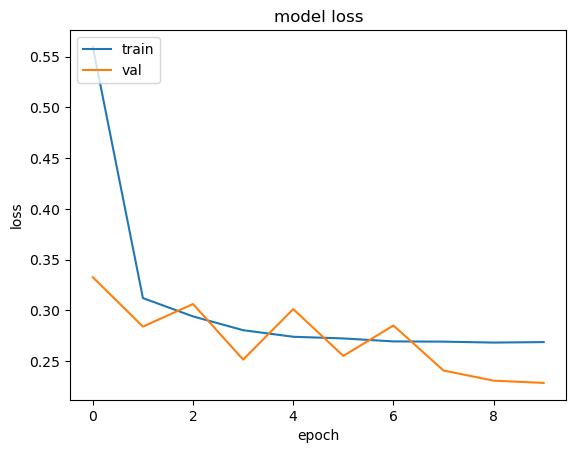

In [12]:
plt.plot(history_d.history['loss'])
plt.plot(history_d.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('Trainingmodel_c.png')
plt.show()

In [9]:
columns = ['dur','proto','service','state','spkts','sbytes','sttl','sload','swin','synack','ackdat','label']
training_data_set = training_data[columns]
training_feature_data_set = training_feature_data[columns]

In [10]:
training_data_features, data_labels= data_preparation(training_feature_data_set)
feature_columns = column_transformation(training_data_features,training_feature_data_set)
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [11]:
batch_size = 32
train, test = train_test_split(training_data_set, test_size=0.2,stratify = training_data_set['label'])
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

train_data_features,train_data_labels = data_preparation(train)
train_dataset = shuffle_dataset(train_data_features,train_data_labels,batch_size)


test_data_features,test_data_labels = data_preparation(test)
test_dataset = shuffle_dataset(test_data_features,test_data_labels,batch_size)

val_data_features,val_data_labels = data_preparation(val)
val_dataset = shuffle_dataset(val_data_features,val_data_labels,batch_size)

164910 train examples
41228 validation examples
51535 test examples


In [29]:
model_dd_ = model_d(feature_layer)

model_dd_.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_d_ = model_dd_.fit(train_dataset,
          validation_data=val_dataset,
          epochs=10)

Epoch 1/10
5154/5154 [==============================] - 64s 10ms/step - loss: 0.5088 - accuracy: 0.8643 - val_loss: 0.2603 - val_accuracy: 0.8865
Epoch 2/10
5154/5154 [==============================] - 54s 10ms/step - loss: 0.2763 - accuracy: 0.8780 - val_loss: 0.2370 - val_accuracy: 0.8905
Epoch 3/10
5154/5154 [==============================] - 53s 10ms/step - loss: 0.2748 - accuracy: 0.8767 - val_loss: 0.2446 - val_accuracy: 0.8920
Epoch 4/10
5154/5154 [==============================] - 55s 10ms/step - loss: 0.2715 - accuracy: 0.8785 - val_loss: 0.2349 - val_accuracy: 0.8907
Epoch 5/10
5154/5154 [==============================] - 53s 10ms/step - loss: 0.2693 - accuracy: 0.8789 - val_loss: 0.2384 - val_accuracy: 0.8905
Epoch 6/10
5154/5154 [==============================] - 52s 10ms/step - loss: 0.2642 - accuracy: 0.8810 - val_loss: 0.2323 - val_accuracy: 0.8919
Epoch 7/10
5154/5154 [==============================] - 54s 10ms/step - loss: 0.2650 - accuracy: 0.8800 - val_loss: 0.2351 -

In [30]:
loss, accuracy = model_dd_.evaluate(test_dataset)
print("Accuracy: ", accuracy)

1611/1611 [==============================] - 9s 5ms/step - loss: 0.2315 - accuracy: 0.8927
Accuracy:  0.8927136659622192


In [31]:
model_dd_ = model_d(feature_layer)
initial_learning_rate = 0.1
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96)

model_dd_.compile(optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_d_ = model_dd_.fit(train_dataset,
          validation_data=val_dataset,
          epochs=10)

Epoch 1/10
5154/5154 [==============================] - 58s 10ms/step - loss: 0.4383 - accuracy: 0.8596 - val_loss: 0.2895 - val_accuracy: 0.8802
Epoch 2/10
5154/5154 [==============================] - 54s 10ms/step - loss: 0.3246 - accuracy: 0.8634 - val_loss: 0.3079 - val_accuracy: 0.8741
Epoch 3/10
5154/5154 [==============================] - 52s 10ms/step - loss: 0.3147 - accuracy: 0.8641 - val_loss: 0.3065 - val_accuracy: 0.8793
Epoch 4/10
5154/5154 [==============================] - 48s 9ms/step - loss: 0.3073 - accuracy: 0.8664 - val_loss: 0.3479 - val_accuracy: 0.8409
Epoch 5/10
5154/5154 [==============================] - 48s 9ms/step - loss: 0.2961 - accuracy: 0.8687 - val_loss: 0.2456 - val_accuracy: 0.8861
Epoch 6/10
5154/5154 [==============================] - 50s 9ms/step - loss: 0.2931 - accuracy: 0.8690 - val_loss: 0.2492 - val_accuracy: 0.8825
Epoch 7/10
5154/5154 [==============================] - 68s 13ms/step - loss: 0.2868 - accuracy: 0.8709 - val_loss: 0.2515 - va

In [12]:
model_ee = model_e(feature_layer)
initial_learning_rate = 0.1
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96)

model_ee.compile(optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_e = model_ee.fit(train_dataset,
          validation_data=val_dataset,
          epochs=10)

Epoch 1/10
5154/5154 [==============================] - 51s 9ms/step - loss: 0.3937 - accuracy: 0.8662 - val_loss: 0.3806 - val_accuracy: 0.7911
Epoch 2/10
5154/5154 [==============================] - 42s 8ms/step - loss: 0.3057 - accuracy: 0.8688 - val_loss: 0.2797 - val_accuracy: 0.8869
Epoch 3/10
5154/5154 [==============================] - 42s 8ms/step - loss: 0.3129 - accuracy: 0.8644 - val_loss: 1.8967 - val_accuracy: 0.6427
Epoch 4/10
5154/5154 [==============================] - 45s 8ms/step - loss: 0.3143 - accuracy: 0.8650 - val_loss: 0.4052 - val_accuracy: 0.8216
Epoch 5/10
5154/5154 [==============================] - 45s 8ms/step - loss: 0.3183 - accuracy: 0.8625 - val_loss: 0.2727 - val_accuracy: 0.8718
Epoch 6/10
5154/5154 [==============================] - 44s 8ms/step - loss: 0.3178 - accuracy: 0.8630 - val_loss: 0.2680 - val_accuracy: 0.8792
Epoch 7/10
5154/5154 [==============================] - 42s 8ms/step - loss: 0.3179 - accuracy: 0.8640 - val_loss: 0.3804 - val_ac

In [39]:
training_feature_data = copy.deepcopy(training_data)
training_data_features, data_labels= data_preparation(training_feature_data)
feature_columns = column_transformation(training_data_features,training_feature_data)
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [40]:
batch_size = 32
train, test = train_test_split(training_data, test_size=0.2,stratify = training_data['label'])
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

train_data_features,train_data_labels = data_preparation(train)
train_dataset = shuffle_dataset(train_data_features,train_data_labels,batch_size)


test_data_features,test_data_labels = data_preparation(test)
test_dataset = shuffle_dataset(test_data_features,test_data_labels,batch_size)

val_data_features,val_data_labels = data_preparation(val)
val_dataset = shuffle_dataset(val_data_features,val_data_labels,batch_size)

164910 train examples
41228 validation examples
51535 test examples


In [41]:
model_ee = model_e(feature_layer)

initial_learning_rate = 0.1
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96)

model_ee.compile(optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model_ee.fit(train_dataset,
          validation_data=val_dataset,
          epochs=10)


Epoch 1/10
5154/5154 [==============================] - 52s 9ms/step - loss: 0.1539 - accuracy: 0.9974 - val_loss: 0.0596 - val_accuracy: 0.9996
Epoch 2/10
5154/5154 [==============================] - 45s 8ms/step - loss: 0.0491 - accuracy: 0.9994 - val_loss: 3.0073e-04 - val_accuracy: 1.0000
Epoch 3/10
5154/5154 [==============================] - 46s 9ms/step - loss: 3.3366e-04 - accuracy: 1.0000 - val_loss: 2.3266e-04 - val_accuracy: 1.0000
Epoch 4/10
5154/5154 [==============================] - 45s 8ms/step - loss: 2.7660e-04 - accuracy: 1.0000 - val_loss: 2.0120e-04 - val_accuracy: 1.0000
Epoch 5/10
5154/5154 [==============================] - 45s 8ms/step - loss: 2.4917e-04 - accuracy: 1.0000 - val_loss: 1.8396e-04 - val_accuracy: 1.0000
Epoch 6/10
5154/5154 [==============================] - 44s 8ms/step - loss: 0.0137 - accuracy: 0.9998 - val_loss: 1.6617e-04 - val_accuracy: 1.0000
Epoch 7/10
5154/5154 [==============================] - 44s 8ms/step - loss: 0.0384 - accuracy: 0.

In [42]:
loss, accuracy = model_ee.evaluate(test_dataset)
print("Accuracy: ", accuracy)

1611/1611 [==============================] - 9s 5ms/step - loss: 4.1945e-04 - accuracy: 1.0000
Accuracy:  1.0


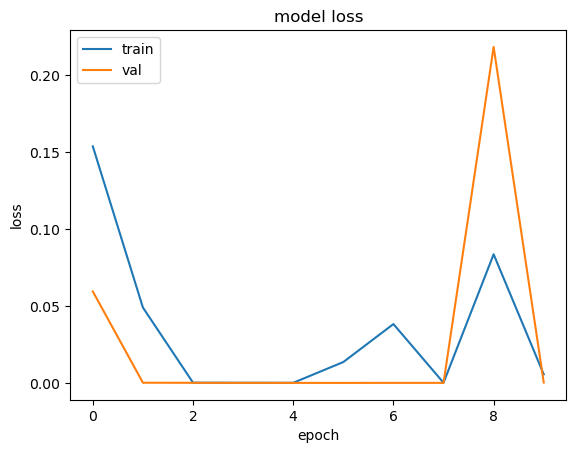

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('Trainingmodel_c.png')
plt.show()

In [44]:
model_ee.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_features_4 (DenseFeat  multiple                 0         
 ures)                                                           
                                                                 
 batch_normalization_33 (Bat  multiple                 664       
 chNormalization)                                                
                                                                 
 dense_33 (Dense)            multiple                  2672      
                                                                 
 batch_normalization_34 (Bat  multiple                 64        
 chNormalization)                                                
                                                                 
 dropout_25 (Dropout)        multiple                  0         
                                                      